# Importing the libraries


In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



# Loading the data

In [2]:
train_data = np.load(r"C:\Users\90544\Downloads\RIT_18\train_data.npy")

In [3]:
classes = np.load(r"C:\Users\90544\Downloads\RIT_18\classes.npy")

In [4]:
train_labels = np.load(r"C:\Users\90544\Downloads\RIT_18\train_labels.npy")

In [5]:
train_mask = np.load(r"C:\Users\90544\Downloads\RIT_18\train_mask.npy")

In [6]:
#Normalizing the values
train_data = cv2.normalize(train_data, None, 0, 255, cv2.NORM_MINMAX)
# Clip the values to ensure they are within the valid 8-bit range (0-255)
train_data = np.clip(train_data, 0, 255).astype(np.uint8)

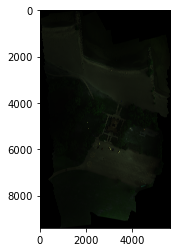

In [7]:
#RGB image
plt.imshow(train_data[:,:,0:3])
plt.show()

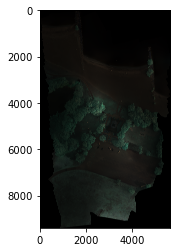

In [8]:
#Infrared image
plt.imshow(train_data[:,:,3:6])
plt.show()

# Mask the train and label data

In [9]:
train_data[train_mask == 0] = 0

In [10]:
train_labels[train_mask == 0] = 0

# Gaussian Naive Bayes Model

Fitting the model , prediction and calculating the accuracy functions

In [11]:
class GaussianNaiveBayes:
    def fit(self, features: np.ndarray, labels: np.ndarray) -> None:
        """Fits the Gaussian Naive Bayes model."""
        
        self.labels = labels
        self.unique_labels = np.unique(labels)
        self.params = []
        # For the given label, calculate the mean and variance of all features
        for idx, label in enumerate(self.unique_labels):
            value_indices = np.where(self.labels == label)
            label_features = [features[i, j] for i, j in zip(*value_indices)]
            self.params.append([(np.mean(label_features), np.var(label_features))])
     
    def likelihood(self, data, mean, var):
        eps = 1e-4
        coeff = 1 / np.sqrt(2 * np.pi * var + eps)
        exponent = np.exp(-((data - mean) ** 2) / (2 * var + eps))
        return coeff * exponent
    
    def predict(self, features):
        predictions=np.empty(len(np.unique(features)))
        count_data=np.empty(len(np.unique(features)))

        for idx, feature in enumerate(np.unique(features)):
            posteriors = []
            prior=np.log((np.count_nonzero(features==feature))/(len(features)*len(features[0])))
            
            for label_idx, label in enumerate(self.unique_labels):
                posteriors.append(prior + np.log(self.likelihood(feature, self.params[label_idx][0][0], self.params[label_idx][0][1])))
            
            predictions[idx] = self.unique_labels[np.argmax(posteriors)]
            count_data[idx] = np.count_nonzero(features==feature)
        
        
        return predictions
        
    def final_predictions(self,labels,features,pred):
        predictions=np.empty((len(features),len(features[0])))
        data_unique=np.unique(features)
        for idx, col in enumerate(features):
            for j, pixel in enumerate(col):
                predictions[idx][j]=pred[np.where(data_unique==pixel)]
                
        return(predictions)
    
    def accuracy(self,predict,label):
        accuracy=0
        for idx, col in enumerate(predict):
            for j, pixel in enumerate(col):
                if(label[idx][j]==pixel):
                    accuracy+=1
        accuracy=accuracy/(len(predict)*len(predict[0]))
        print(accuracy)
                    

For red layer :

In [12]:
#ax=train x , bx=train y , ay=test x , by=test y
red_data=train_data[:,:,0]
ax,ay = red_data[:7500,:], red_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for layer1:")
gnb.accuracy(predict,by)

Accuracy for layer1:
0.556547256230299


Text(0.5, 1.0, 'Label')

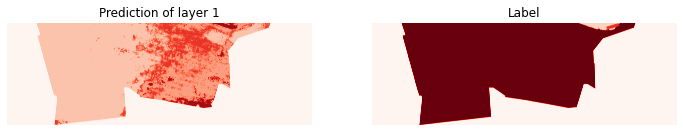

In [13]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="Reds")
axs[0].axis("off")
axs[0].set_title("Prediction of layer 1") 

axs[1].imshow(by,cmap="Reds")
axs[1].axis("off")
axs[1].set_title("Label") 


For green layer :

In [14]:
#ax=train x , bx=train y , ay=test x , by=test y
green_data=train_data[:,:,1]
ax,ay = green_data[:7500,:], green_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for layer2:")
gnb.accuracy(predict,by)

Accuracy for layer2:
0.5067102946301352


Text(0.5, 1.0, 'Label')

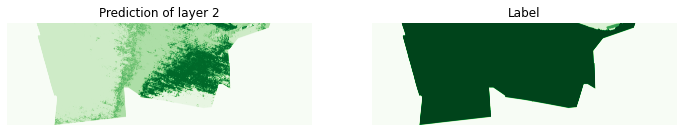

In [15]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="Greens")
axs[0].axis("off")
axs[0].set_title("Prediction of layer 2") 

axs[1].imshow(by,cmap="Greens")
axs[1].axis("off")
axs[1].set_title("Label") 


For blue layer :

In [16]:
#ax=train x , bx=train y , ay=test x , by=test y
blue_data=train_data[:,:,2]
ax,ay = blue_data[:7500,:], blue_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for layer3:")
gnb.accuracy(predict,by)

Accuracy for layer3:
0.4833949514180586


Text(0.5, 1.0, 'Label')

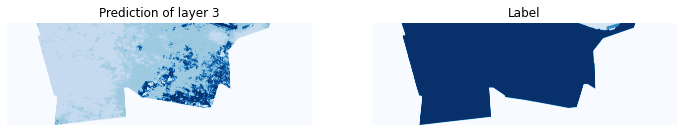

In [17]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="Blues")
axs[0].axis("off")
axs[0].set_title("Prediction of layer 3") 

axs[1].imshow(by,cmap="Blues")
axs[1].axis("off")
axs[1].set_title("Label") 


For layer-4 :

In [18]:
#ax=train x , bx=train y , ay=test x , by=test y
h1_data=train_data[:,:,3]
ax,ay = h1_data[:7500,:], h1_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for layer4:")
gnb.accuracy(predict,by)

Accuracy for layer4:
0.48461251952893486


Text(0.5, 1.0, 'Label')

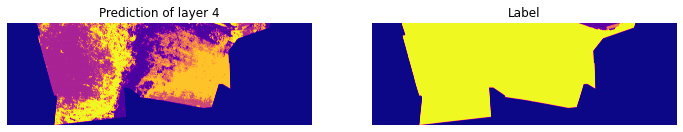

In [19]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="plasma")
axs[0].axis("off")
axs[0].set_title("Prediction of layer 4") 

axs[1].imshow(by,cmap="plasma")
axs[1].axis("off")
axs[1].set_title("Label") 


For layer-5 :

In [20]:
#ax=train x , bx=train y , ay=test x , by=test y
h2_data=train_data[:,:,4]
ax,ay = h2_data[:7500,:], h2_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for layer5:")
gnb.accuracy(predict,by)

<ipython-input-11-9c971be919b8>:29: RuntimeWarning: divide by zero encountered in log
  posteriors.append(prior + np.log(self.likelihood(feature, self.params[label_idx][0][0], self.params[label_idx][0][1])))


Accuracy for layer5:
0.5591989592807547


Text(0.5, 1.0, 'Label')

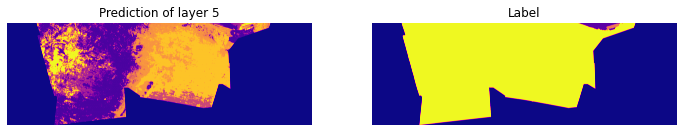

In [21]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="plasma")
axs[0].axis("off")
axs[0].set_title("Prediction of layer 5") 

axs[1].imshow(by,cmap="plasma")
axs[1].axis("off")
axs[1].set_title("Label") 


For layer-6 :

In [22]:
#ax=train x , bx=train y , ay=test x , by=test y
h3_data=train_data[:,:,5]
ax,ay = h3_data[:7500,:], h3_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for layer6:")
gnb.accuracy(predict,by)

<ipython-input-11-9c971be919b8>:29: RuntimeWarning: divide by zero encountered in log
  posteriors.append(prior + np.log(self.likelihood(feature, self.params[label_idx][0][0], self.params[label_idx][0][1])))


Accuracy for layer6:
0.5413925406257086


Text(0.5, 1.0, 'Label')

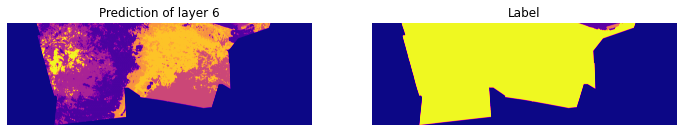

In [23]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="plasma")
axs[0].axis("off")
axs[0].set_title("Prediction of layer 6") 

axs[1].imshow(by,cmap="plasma")
axs[1].axis("off")
axs[1].set_title("Label") 


For RGB:

In [24]:
#ax=train x , bx=train y , ay=test x , by=test y
RGB_data=red_data+green_data+blue_data
ax,ay = RGB_data[:7500,:], RGB_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for RGB:")
gnb.accuracy(predict,by)

Accuracy for RGB:
0.5243001464564779


Text(0.5, 1.0, 'Label')

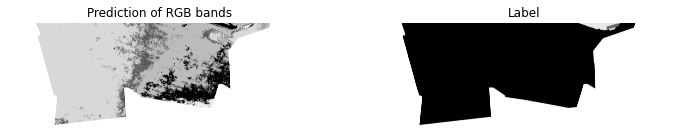

In [25]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="Greys")
axs[0].axis("off")
axs[0].set_title("Prediction of RGB bands") 

axs[1].imshow(by,cmap="Greys")
axs[1].axis("off")
axs[1].set_title("Label") 


For Infrared band :

In [26]:
#ax=train x , bx=train y , ay=test x , by=test y
infrared_data=h1_data+h2_data+h3_data
ax,ay = infrared_data[:7500,:], infrared_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for Infrared band:")
gnb.accuracy(predict,by)

<ipython-input-11-9c971be919b8>:29: RuntimeWarning: divide by zero encountered in log
  posteriors.append(prior + np.log(self.likelihood(feature, self.params[label_idx][0][0], self.params[label_idx][0][1])))


Accuracy for Infrared band:
0.545008541890092


Text(0.5, 1.0, 'Label')

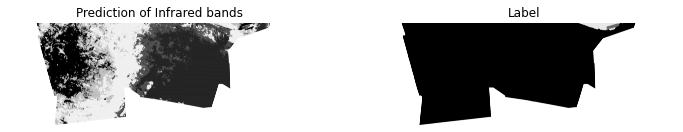

In [27]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="Greys")
axs[0].axis("off")
axs[0].set_title("Prediction of Infrared bands") 

axs[1].imshow(by,cmap="Greys")
axs[1].axis("off")
axs[1].set_title("Label") 


For all :

In [28]:
#ax=train x , bx=train y , ay=test x , by=test y
all_data=infrared_data+RGB_data
ax,ay = all_data[:7500,:], all_data[7500:,:]
bx, by = train_labels[:7500,:], train_labels[7500:,:]

#fitting the model
gnb = GaussianNaiveBayes()
gnb.fit(ax, bx)

#predict the values
predictions=gnb.predict(ay)
predict=gnb.final_predictions(by,ay,predictions)

#calculating accuracy
print("Accuracy for all :")
gnb.accuracy(predict,by)

Accuracy for all :
0.4850472449010356


Text(0.5, 1.0, 'Label')

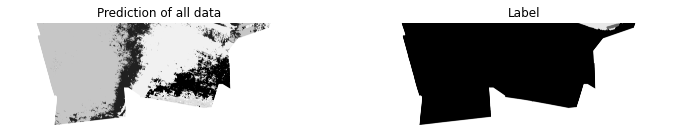

In [29]:
fig,axs=plt.subplots(1,2,figsize=(12,10))

axs[0].imshow(predict,cmap="Greys")
axs[0].axis("off")
axs[0].set_title("Prediction of all data") 

axs[1].imshow(by,cmap="Greys")
axs[1].axis("off")
axs[1].set_title("Label") 


# Summary and Report

First I load the data then analyze it.First layer is red , second one is green , third one is blue and rest of them are infrared 
bands.I seperated all of them.Also I masked the train and label image data.
Then I defined gaussian naive bayes class and functions.I fit the model , then calculated likelihood and prior for each unique pixel to each label class(0,1,2,...,9).I choose most likely label for each unique pixel and predict it.Finally I calculated accuracy by using test-y list and predictions list.
The maximum accuracy has predicted by layer-5 .The minimum accuracy has predicted by layer-3. The accuracy decreased for all
data(combination of 6 layer).
